In [23]:
import cv2
from matplotlib import pyplot as plt

##### Input and output image

In [24]:
input_image = '1587274368.png'
reference_image = 'reference.jpeg'

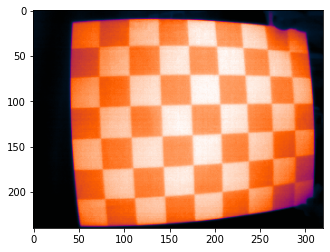

In [25]:
img1 = cv2.imread(input_image)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)

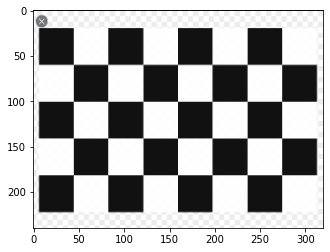

In [26]:
img2 = cv2.imread(reference_image)
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

In [27]:
img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

##### Detect corners using OpenCV findChessboardCorners()

In [28]:
patterns = (7,4)
ret1, corners1 = cv2.findChessboardCorners(img1,patterns )
ret2, corners2 = cv2.findChessboardCorners(img2, patterns)
corners2

array([[[ 44.472122,  59.82851 ]],

       [[ 82.562035,  59.869225]],

       [[121.41363 ,  59.832367]],

       [[159.49907 ,  59.842716]],

       [[197.55219 ,  59.837574]],

       [[236.32709 ,  59.892345]],

       [[274.5142  ,  59.83946 ]],

       [[ 44.474354, 100.47608 ]],

       [[ 82.56103 , 100.47881 ]],

       [[121.417915, 100.48218 ]],

       [[159.4992  , 100.47171 ]],

       [[197.54872 , 100.46926 ]],

       [[236.33438 , 100.47375 ]],

       [[274.51733 , 100.46985 ]],

       [[ 44.47766 , 140.96204 ]],

       [[ 82.56478 , 141.02054 ]],

       [[121.41077 , 140.92842 ]],

       [[159.49962 , 140.97098 ]],

       [[197.55824 , 140.94037 ]],

       [[236.32    , 140.88104 ]],

       [[274.5189  , 140.95584 ]],

       [[ 44.47441 , 181.51512 ]],

       [[ 82.55953 , 181.51364 ]],

       [[121.42086 , 181.51875 ]],

       [[159.5007  , 181.51086 ]],

       [[197.55614 , 181.51016 ]],

       [[236.32639 , 181.5056  ]],

       [[274.51447 , 181.510

##### Find homography between two images using detected corners

In [29]:
H, _ = cv2.findHomography(corners1, corners2)
print(H)

[[ 9.90249381e-01 -3.63178325e-02 -2.57577970e+01]
 [-3.92673574e-02  1.11766177e+00 -1.97373110e+01]
 [-6.09980919e-04  3.48714397e-05  1.00000000e+00]]


##### use warpPerspective

In [30]:
img1_warp = cv2.warpPerspective(img1, H, (img1.shape[1], img1.shape[0]))

True

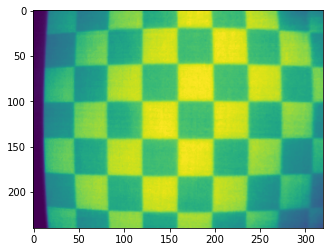

In [31]:
plt.imshow(img1_warp)
cv2.imwrite('new.png', img1_warp)

In [ ]:
import numpy as np
img_draw_matches = cv2.hconcat([img1, img2])
for i in range(len(corners1)):
    print (corners1[i])
    pt1 = np.array([corners1[i][0][0], corners1[i][0][1], 1])
    pt1 = pt1.reshape(3, 1)
    pt2 = np.dot(H, pt1)
    pt2 = pt2/pt2[2]
    end = (int(img1.shape[1] + pt2[0]), int(pt2[1]))
    cv2.line(img_draw_matches, tuple([int(j) for j in corners1[i]]), end, randomColor(), 2)
plt.imshow(img_draw_matches)